<a href="https://colab.research.google.com/github/jsansao/idl/blob/main/Licao32_IdentificacaoFacial_VisualEmbeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lição 32 - Identificação facial com visual embeddings

Vamos extrair os visual embeddings usando o VGGFace2 e criar um classificador com SVM.

## Download do dataset

In [1]:
!wget https://github.com/jsansao/fame-dataset/archive/refs/heads/main.zip

--2023-11-14 18:32:25--  https://github.com/jsansao/fame-dataset/archive/refs/heads/main.zip
Resolving github.com (github.com)... 20.29.134.23
Connecting to github.com (github.com)|20.29.134.23|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/jsansao/fame-dataset/zip/refs/heads/main [following]
--2023-11-14 18:32:26--  https://codeload.github.com/jsansao/fame-dataset/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 20.29.134.24
Connecting to codeload.github.com (codeload.github.com)|20.29.134.24|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘main.zip’

main.zip                [        <=>         ]  47.24M  27.7MB/s    in 1.7s    

2023-11-14 18:32:28 (27.7 MB/s) - ‘main.zip’ saved [49530242]



In [2]:
!unzip main.zip

Archive:  main.zip
e76125873a9351f49ba1f84baf8e2ff90f3731ab
   creating: fame-dataset-main/
   creating: fame-dataset-main/train/
   creating: fame-dataset-main/train/AlPacino/
  inflating: fame-dataset-main/train/AlPacino/1.al_pacino.jpg  
  inflating: fame-dataset-main/train/AlPacino/11.29373_0d16849303cb824.jpg  
  inflating: fame-dataset-main/train/AlPacino/12.210px-al_pacino_roma_film_fest_cropped.jpg  
  inflating: fame-dataset-main/train/AlPacino/13.image-w856.jpg  
  inflating: fame-dataset-main/train/AlPacino/14.os-80-anos-de-al-pacino0298839100202004251215.jpg  
  inflating: fame-dataset-main/train/AlPacino/15.filmes-com-al-pacino-pdb-117%e2%80%8b.jpg  
  inflating: fame-dataset-main/train/AlPacino/19.al-pacino.jpg  
  inflating: fame-dataset-main/train/AlPacino/2.1337912.jpg  
  inflating: fame-dataset-main/train/AlPacino/23.al_pacino_2016_%2830401544240%29.jpg  
  inflating: fame-dataset-main/train/AlPacino/25.al_pacino.jpg  
 extracting: fame-dataset-main/train/AlPacino/26

## Extração das faces do dataset, geração dos conjuntos de treinamento e validação




In [3]:
!pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 14.6 MB/s eta 0:00:00


In [5]:
# face detection for the 5 Celebrity Faces Dataset
from os import listdir
from os.path import isdir
from PIL import Image
from matplotlib import pyplot
from numpy import savez_compressed
from numpy import asarray
import mtcnn

# extract a single face from a given photograph
def extract_face(filename, required_size=(224, 224)):
	# load image from file
	image = Image.open(filename)
	# convert to RGB, if needed
	image = image.convert('RGB')
	# convert to array
	pixels = asarray(image)
	# create the detector, using default weights
	detector = mtcnn.MTCNN()
	# detect faces in the image
	results = detector.detect_faces(pixels)
	# extract the bounding box from the first face
	x1, y1, width, height = results[0]['box']
	# bug fix
	x1, y1 = abs(x1), abs(y1)
	x2, y2 = x1 + width, y1 + height
	# extract the face
	face = pixels[y1:y2, x1:x2]
	# resize pixels to the model size
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array

# load images and extract faces for all images in a directory
def load_faces(directory):
	faces = list()
	# enumerate files
	for filename in listdir(directory):
		# path
		path = directory + filename
		# get face
		face = extract_face(path, (224,224))
		# store
		faces.append(face)
	return faces

# load a dataset that contains one subdir for each class that in turn contains images
def load_dataset(directory):
	X, y = list(), list()
	# enumerate folders, on per class
	for subdir in listdir(directory):
		# path
		path = directory + subdir + '/'
		# skip any files that might be in the dir
		if not isdir(path):
			continue
		# load all faces in the subdirectory
		faces = load_faces(path)
		# create labels
		labels = [subdir for _ in range(len(faces))]
		# summarize progress
		print('>loaded %d examples for class: %s' % (len(faces), subdir))
		# store
		X.extend(faces)
		y.extend(labels)
	return asarray(X), asarray(y)



In [6]:
# load train dataset
trainX, trainy = load_dataset('/content/fame-dataset-main/train/')
print(trainX.shape, trainy.shape)
# load test dataset
testX, testy = load_dataset('/content/fame-dataset-main/val/')
# save arrays to one file in compressed format
savez_compressed('fame-faces-dataset.npz', trainX, trainy, testX, testy)

1/1 [==============================] - 0s 264ms/step


1/1 [==============================] - 0s 176ms/step


1/1 [==============================] - 0s 128ms/step
>loaded 15 examples for class: KristenStewart
1/1 [==============================] - 0s 117ms/step
>loaded 15 examples for class: TomHanks
1/1 [==============================] - 0s 129ms/step
>loaded 15 examples for class: EmilyBlunt
1/1 [==============================] - 0s 188ms/step
>loaded 15 examples for class: AlPacino
1/1 [==============================] - 0s 121ms/step
>loaded 15 examples for class: AngelinaJolie
1/1 [==============================] - 0s 181ms/step
>loaded 15 examples for class: MerylStreep
1/1 [==============================] - 0s 131ms/step
>loaded 15 examples for class: ClintEastwood
1/1 [==============================] - 0s 130ms/step
>loaded 20 examples for class: NicolasCage
(125, 224, 224, 3) (125,)
1/1 [==============================] - 0s 197ms/step
>loaded 11 examples for class: KristenStewart
1/1 [==============================] - 0s 137ms/step
>loaded 4 examples for class: TomHanks
1/1 [==========

## Instação do VGGFACE

In [7]:
!pip install git+https://github.com/pleshro/keras-vggface.git
!pip install keras_applications



  Cloning https://github.com/pleshro/keras-vggface.git to /tmp/pip-req-build-wrd7hzez
  Running command git clone --filter=blob:none --quiet https://github.com/pleshro/keras-vggface.git /tmp/pip-req-build-wrd7hzez
  Resolved https://github.com/pleshro/keras-vggface.git to commit 85e5017fa0f0f67bff8d1976460e620abe76e734
  Preparing metadata (setup.py) ... done
  Created wheel for keras-vggface: filename=keras_vggface-0.6-py3-none-any.whl size=8338 sha256=ab61494813e620308f8f1892ff79e23f19ac513c625b62e46460396a4b394348
  Stored in directory: /tmp/pip-ephem-wheel-cache-8ah74is8/wheels/6e/43/54/51f3f3e2c0b0d7465db8f642a2cfdf8a861507bcf5c5d520b2
Successfully built keras-vggface
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.3 MB/s eta 0:00:00


In [9]:


from numpy import expand_dims
from matplotlib import pyplot
from PIL import Image
from numpy import asarray

import mtcnn
#from keras.utils.layer_utils import get_source_inputs

from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
from keras_vggface.utils import decode_predictions



## Carregamento do modelo pré-treinado, sem camadas de saída

In [10]:
model = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3), pooling='avg')

94694792/94694792 [==============================] - 1s 0us/step


## Extração dos embeddings

In [11]:
# get the face embedding for one face
def get_embedding(model, face_pixels):
	# scale pixel values
  samples = face_pixels.astype('float32')
  samples = expand_dims(samples, axis=0)
  samples = preprocess_input(samples, version=2)
  # transform face into one sample
  # make prediction to get embedding
  yhat = model.predict(samples)
  return yhat[0]

In [12]:
# convert each face in the train set to an embedding
newTrainX = list()
for face_pixels in trainX:
	embedding = get_embedding(model, face_pixels)
	newTrainX.append(embedding)
newTrainX = asarray(newTrainX)
print(newTrainX.shape)
# convert each face in the test set to an embedding
newTestX = list()
for face_pixels in testX:
	embedding = get_embedding(model, face_pixels)
	newTestX.append(embedding)
newTestX = asarray(newTestX)
print(newTestX.shape)

1/1 [==============================] - 0s 24ms/step
(125, 2048)
1/1 [==============================] - 0s 23ms/step
(54, 2048)


In [13]:
savez_compressed('fame-faces-embeddings.npz', newTrainX, trainy, newTestX, testy)

## Classificação dos embeddings com SVM

In [14]:

# develop a classifier for the 5 Celebrity Faces Dataset
from numpy import load
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
# load dataset
data = load('fame-faces-embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Dataset: train=%d, test=%d' % (trainX.shape[0], testX.shape[0]))
# normalize input vectors
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)
# fit model
model = SVC(kernel='linear', probability=True)
model.fit(trainX, trainy)
# predict
yhat_train = model.predict(trainX)
yhat_test = model.predict(testX)
# score
score_train = accuracy_score(trainy, yhat_train)
score_test = accuracy_score(testy, yhat_test)
# summarize
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

Dataset: train=125, test=54
Accuracy: train=100.000, test=100.000


## Teste do classificador SVM

In [15]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 1.clint_eastwood_at_2010_new_york_film_festival.jpg to 1.clint_eastwood_at_2010_new_york_film_festival.jpg
User uploaded file "1.clint_eastwood_at_2010_new_york_film_festival.jpg" with length 311826 bytes


1/1 [==============================] - 1s 697ms/step


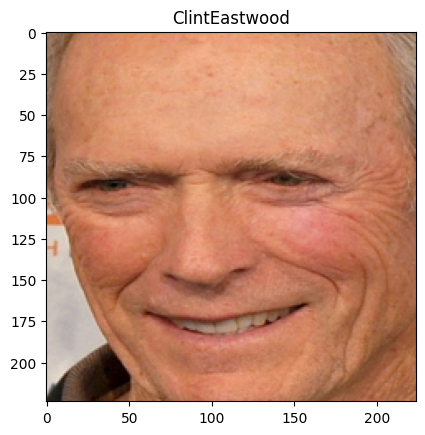

In [16]:
for fn in uploaded.keys():
  face_t = extract_face(fn)
  model_t = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3), pooling='avg')
  embedded_t = get_embedding(model_t, face_t)
  embe_in = embedded_t.reshape(-1,2048)
  yhat_test = model.predict(embe_in)
  saida = out_encoder.inverse_transform(yhat_test)
  pyplot.imshow(face_t)
  pyplot.title(saida[0])
  pyplot.show()
